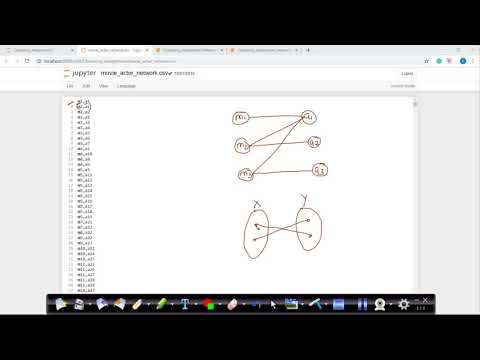

In [1]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='_XJlZtZqMUs', width=600)

In [0]:
!pip install stellargraph

In [0]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph
from sklearn.manifold import TSNE

In [3]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [5]:
%cd /drive/My Drive/Appliedai colab/Assignment 12 - Graph dataset

/drive/My Drive/Appliedai colab/Assignment 12 - Graph dataset


In [6]:
!ls

Clustering_Assignment_Instructions.ipynb  udaylunawat_gmail_com_12.html
Clustering_Assignment_Reference.ipynb	  udaylunawat@gmail.com_12.ipynb
movie_actor_network.csv			  udaylunawat_gmail_com_12.pdf


In [0]:
# to install this you need to use "pip install stellargraph"

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>
    
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/4SPYPFa.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

In [0]:
data = pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [0]:
edges = [tuple(x) for x in data.values.tolist()]

In [0]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [0]:
A = list(nx.connected_component_subgraphs(B))[0]

In [12]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


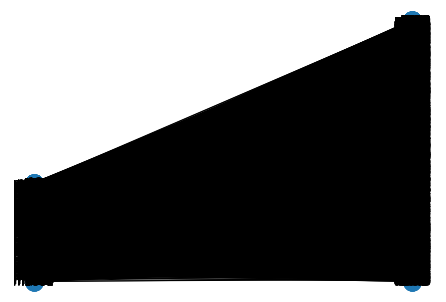

CPU times: user 11.4 s, sys: 789 ms, total: 12.2 s
Wall time: 12 s


In [15]:
%%time
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [16]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [17]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [0]:
# Seperating actors and movie ids and embeddings

set_1_actors = []
set_2_movies = []
set_1_id = []
set_2_id = []
for index, vector in zip(model.wv.index2word, model.wv.vectors):
  if 'm' in index:
    set_2_id.append(index)
    set_2_movies.append(vector)
  if 'a' in index:
    set_1_id.append(index)
    set_1_actors.append(vector)

### **Grouping Similar Actors**

In [0]:
def best_cluster_actors(clusters):
  total_cost = []
  C = nx.Graph()
  for cluster in clusters:
    list_ego_edges = []
    algo = KMeans(n_clusters = cluster, random_state=0).fit(set_1_actors)
    cluster_pred = algo.predict(set_1_actors) # predicting cluster no. for each actor
    for cluster_no in range(cluster): # for every cluster
      ego_edges = []
      for index, pred in enumerate(cluster_pred):
        if pred == cluster_no: #If actor cluster no. matches cluster no. 
          C.add_node(set_1_id[index], label = str(pred))
          C = nx.ego_graph(B, actors[index])
          ego_edges.extend(list(C.edges())) # https://www.w3schools.com/python/ref_list_extend.asp
    list_ego_edges.append(ego_edges)

    largest_cc = []
    for index, ego_edges_value in enumerate(list_ego_edges):
      cluster_set = nx.Graph()
      cluster_set.add_edges_from(ego_edges_value, label = index)
      largest_cc.append(len(max(nx.connected_components(cluster_set), key=len)))

      actors_list = []
      movies_list = []
      for i in cluster_set.nodes():
        if 'm' in i:
          movies_list.append(i)
        if 'a' in i:
          actors_list.append(i)

    cost1 = 0
    cost2 = 0
    total_nodes_in_cluster = len(list(cluster_set.nodes()))
    for index, ego_edges in enumerate(list_ego_edges):
      cost1 += largest_cc[index]/total_nodes_in_cluster
      cost2 += len(ego_edges) / len(movies_list)
    cost1 = cost1 / len(list_ego_edges)
    cost2 = cost2 / len(list_ego_edges)
    total_cost.append(cost1*cost2)
  max_cost = max(total_cost)
  return clusters[total_cost.index(max_cost)], max_cost, total_cost

In [0]:
%%time
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
best_k, max_cost, total_cost = best_cluster_actors(clusters)

In [31]:
print("cluster_no\t\t","cost")
for cluster_no, cost in zip(clusters, total_cost):
  print(cluster_no,"\t\t", cost)

cluster_no		 cost
3 		 1.7252256720563437
5 		 0.8429468874928612
10 		 1.2131225443039442
30 		 1.0
50 		 0.5428321678321678
100 		 0.1161279844079909
200 		 0.8244565217391304
500 		 1.0


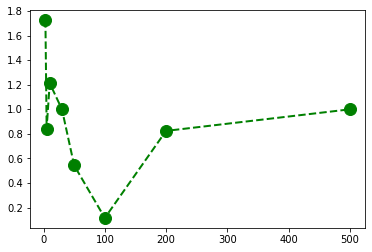

In [25]:
plt.plot(clusters, total_cost, 'go--', linewidth=2, markersize=12);

In [32]:
print("Best k with highest cost is {0} with cost {1}".format(best_k, max_cost))

Best k with highest cost is 3 with cost 1.7252256720563437


In [0]:
actor_graph = nx.Graph()
kmeans = KMeans(n_clusters = best_k, random_state=0).fit(set_1_actors)
cluster_pred = kmeans.predict(set_1_actors)
for cluster_no in range(best_k): # for every cluster
   for index, pred in enumerate(cluster_pred):
     if pred == cluster_no:
       actor_graph.add_node(set_1_id[index],label=str(cluster_no))

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = set_1_id  # list of node IDs
node_embeddings = set_1_actors
node_targets = [ actor_graph.node[node_id]['label'] for node_id in node_ids]

In [0]:
%%time
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

CPU times: user 33.4 s, sys: 312 ms, total: 33.7 s
Wall time: 33.7 s


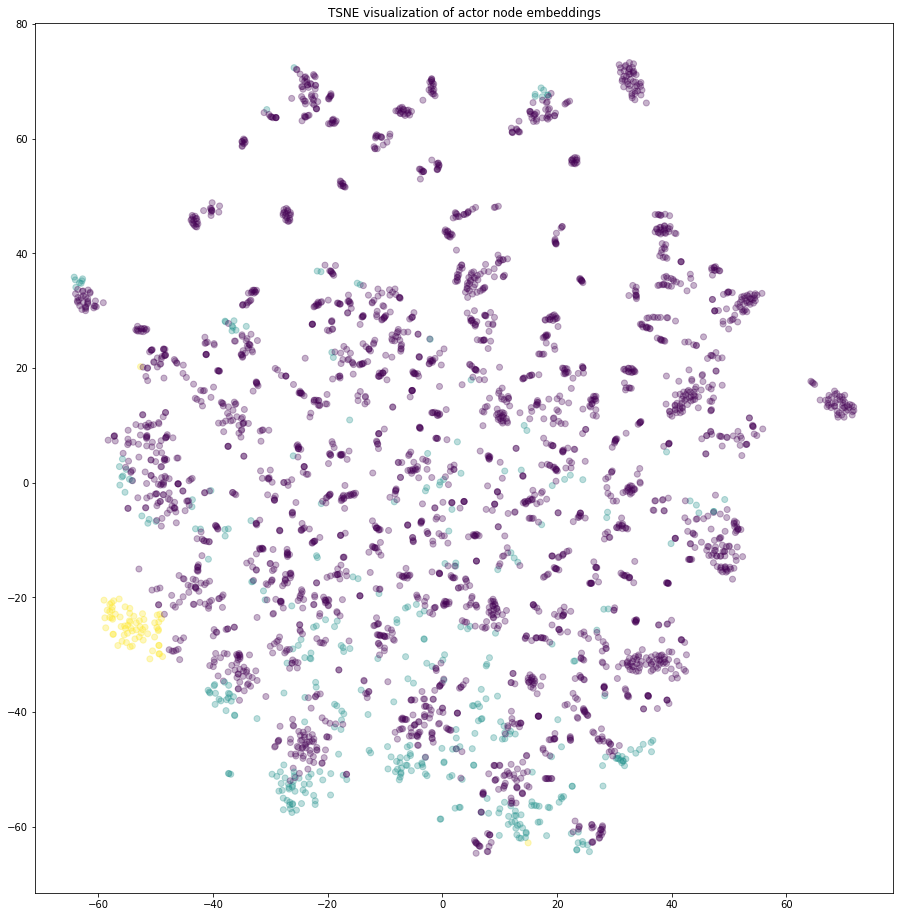

In [0]:
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor node embeddings'.format(transform.__name__))

plt.show()

### **Grouping Similar Movies**

In [0]:
def best_cluster_movies(clusters):
  total_cost = []
  C = nx.Graph()
  for cluster in clusters:
    list_ego_edges = []
    algo = KMeans(n_clusters = cluster, random_state=0).fit(set_2_movies)
    cluster_pred = algo.predict(set_2_movies) # predicting cluster no. for each actor
    for cluster_no in range(cluster): # for every cluster
      ego_edges = []
      for index, pred in enumerate(cluster_pred):
        if pred == cluster_no: #If actor cluster no. matches cluster no. 
          C.add_node(set_2_id[index], label = str(pred))
          C = nx.ego_graph(B, movies[index])
          ego_edges.extend(list(C.edges())) # https://www.w3schools.com/python/ref_list_extend.asp
    list_ego_edges.append(ego_edges)

    largest_cc = []
    for index, ego_edges_value in enumerate(list_ego_edges):
      cluster_set = nx.Graph()
      cluster_set.add_edges_from(ego_edges_value, label = index)
      largest_cc.append(len(max(nx.connected_components(cluster_set), key=len)))

      actors_list = []
      movies_list = []
      for i in cluster_set.nodes():
        if 'm' in i:
          movies_list.append(i)
        if 'a' in i:
          actors_list.append(i)

    cost1 = 0
    cost2 = 0
    total_nodes_in_cluster = len(list(cluster_set.nodes()))
    for index, ego_edges in enumerate(list_ego_edges):
      cost1 += largest_cc[index]/total_nodes_in_cluster
      cost2 += len(ego_edges) / len(actors_list)
    cost1 = cost1 / len(list_ego_edges)
    cost2 = cost2 / len(list_ego_edges)
    total_cost.append(cost1*cost2)
  max_cost = max(total_cost)
  return clusters[total_cost.index(max_cost)], max_cost, total_cost

In [34]:
%%time
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
best_k, max_cost, total_cost = best_cluster_movies(clusters)

CPU times: user 21.7 s, sys: 9.93 s, total: 31.6 s
Wall time: 18.1 s


In [35]:
print("cluster_no\t\t","cost")
for cluster_no, cost in zip(clusters, total_cost):
  print(cluster_no,"\t\t", cost)

cluster_no		 cost
3 		 1.540197264236817
5 		 1.8680311338165672
10 		 1.188977688977689
30 		 0.3929765886287626
50 		 0.5
100 		 1.0
200 		 1.0714285714285714
500 		 1.0


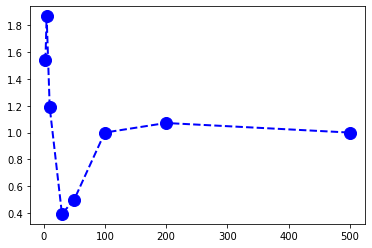

In [36]:
plt.plot(clusters, total_cost, 'bo--', linewidth=2, markersize=12);

In [37]:
print("Best k with highest cost is {0} with cost {1}".format(best_k, max_cost))

Best k with highest cost is 5 with cost 1.8680311338165672


In [0]:
movie_graph = nx.Graph()
kmeans = KMeans(n_clusters = best_k, random_state=0).fit(set_2_movies)
cluster_pred = kmeans.predict(set_2_movies)
for cluster_no in range(best_k): # for every cluster
   for index, pred in enumerate(cluster_pred):
     if pred == cluster_no:
       movie_graph.add_node(set_2_id[index],label=str(cluster_no))

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = set_2_id  # list of node IDs
node_embeddings = set_2_movies
node_targets = [ movie_graph.node[node_id]['label'] for node_id in node_ids]

In [40]:
%%time
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

CPU times: user 9.77 s, sys: 29.9 ms, total: 9.8 s
Wall time: 9.82 s


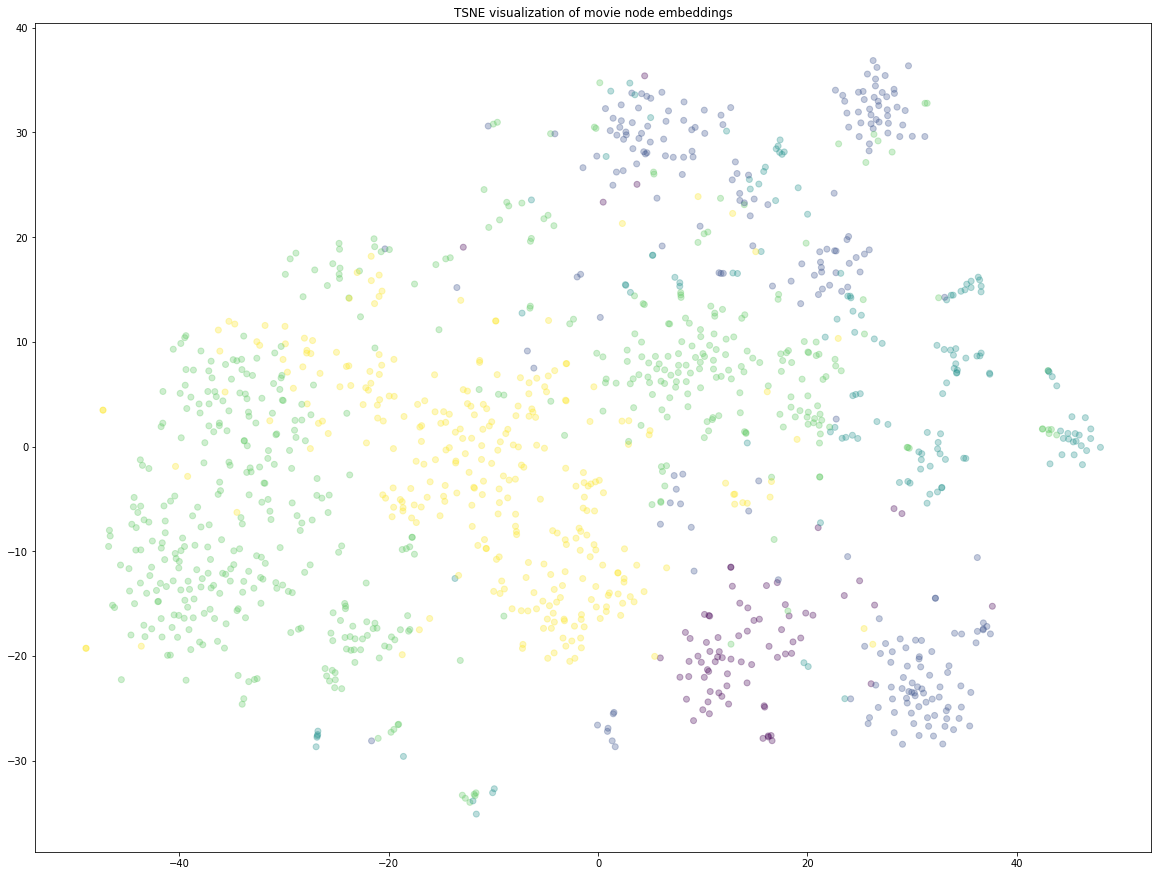

In [41]:
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of movie node embeddings'.format(transform.__name__))

plt.show()